In [ ]:
# List of required libraries
required_libraries = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'nltk',
    'wordcloud',
    'emoji'
]

def install(package):
    """Install the package using pip in a Jupyter Notebook."""
    print(f"Installing {package}...")
    # Use the Jupyter magic command for installation
    get_ipython().system(f'pip install {package}')

def check_libraries(libraries):
    """Check if the libraries are installed and install them if necessary."""
    missing_libraries = []
    for library in libraries:
        try:
            __import__(library)
        except ImportError:
            missing_libraries.append(library)
        except Exception as e:
            # Captura outros erros que podem ocorrer durante a importação
            print(f"Error importing {library}: {e}")
            missing_libraries.append(library)

    if missing_libraries:
        print(f"The following libraries are missing: {', '.join(missing_libraries)}")
        print("Starting installation...")

        installation_success = True  # Flag to track installation success

        for library in missing_libraries:
            try:
                install(library)
                print(f"{library} installed successfully.")
            except Exception as e:
                print(f"Failed to install {library}: {e}")
                installation_success = False  # Mark as failed if there was an error

        # Check again if the libraries were installed
        for library in missing_libraries:
            try:
                __import__(library)
            except ImportError:
                print(f"Error: {library} was not installed correctly.")
                installation_success = False  # Mark as failed if still missing

        # Final message based on installation success
        if installation_success:
            print("All libraries were installed successfully.")
        else:
            print("Some libraries were not installed correctly.")
    else:
        print("All libraries are already installed.")
if __name__ == "__main__":
    check_libraries(required_libraries)

All libraries are already installed.


# **Library imports**
In this cell, we will import all the necessary libraries that we will use throughout the analysis. This includes libraries for data manipulation, visualization, and machine learning.

In [ ]:
import re
import warnings

# Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import emoji

# Machine Learning Libraries
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Other Libraries
from wordcloud import WordCloud

# Data Loading
Here, we will load the dataset containing information about Cyberbullying Detection on Twitter and related factors. We will examine the structure of the data and check for any initial issues such as missing values.

In [ ]:
warnings.filterwarnings('ignore')

# Paths to the CSV files
path_data = '/content/cyberbullying_tweets.csv (1).zip'

# Reading the CSV files
df = pd.read_csv(path_data)

In [ ]:
# Display the first few rows of dataset to verify the reading
print("\nCyberbullying Data:")
print(df.head())


Cyberbullying Data:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [ ]:
# Using shape to check the dimensions of the combined DataFrame
print("\nShape of Combined Data:", df.shape)


Shape of Combined Data: (47692, 2)


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 tweet_text            0
cyberbullying_type    0
dtype: int64


In [ ]:
# Check data types
data_types = df.dtypes
print("\nData Types of Each Column:\n", data_types)


Data Types of Each Column:
 tweet_text            object
cyberbullying_type    object
dtype: object


In [ ]:
# Summary statistics for numerical columns
summary_statistics = df.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
                       tweet_text cyberbullying_type
count                      47692              47692
unique                     46017                  6
top     MARINATED IN GATER TEARS           religion
freq                           2               7998


In [ ]:
# Check unique values in categorical columns
for column in df[['cyberbullying_type']].select_dtypes(include=['object']).columns:
 print(f"\nUnique Values in '{column}':\n", df[column].value_counts())


Unique Values in 'cyberbullying_type':
 cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


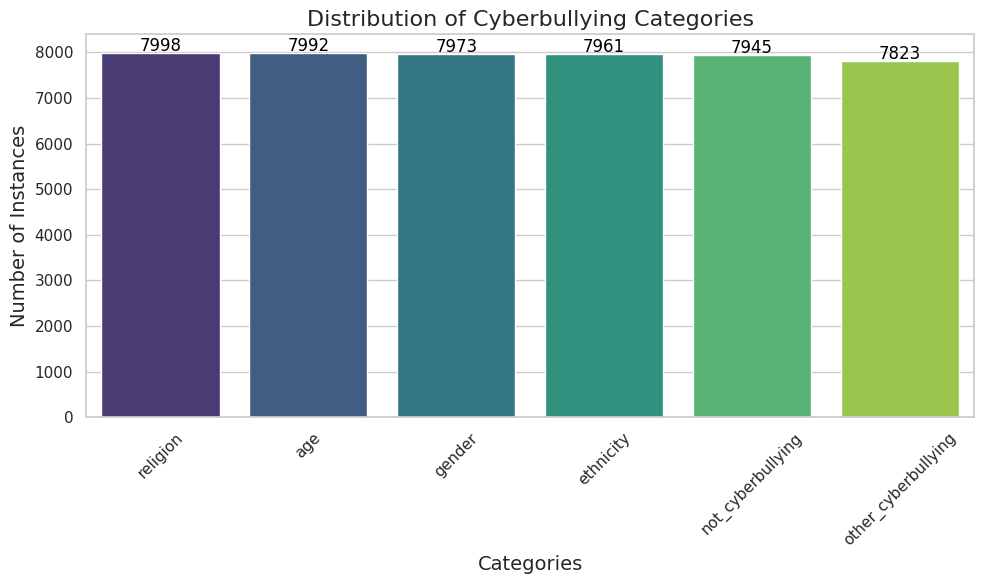

In [ ]:
# Plotting the distribution graph

# Check the distribution of categories
category_counts = df['cyberbullying_type'].value_counts()  # Change 'label' to your actual column name for categories

# Create a DataFrame for the counts
category_distribution = category_counts.reset_index()
category_distribution.columns = ['Category', 'Count']  # Rename columns for clarity

# Set the visual style of the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
bar_plot = sns.barplot(data=category_distribution, x='Category', y='Count', palette='viridis')

# Add titles and labels
plt.title('Distribution of Cyberbullying Categories', fontsize=16)  # Title of the plot
plt.xlabel('Categories', fontsize=14)  # X-axis label
plt.ylabel('Number of Instances', fontsize=14)  # Y-axis label
# Rotate x labels for better readability
plt.xticks(rotation=45)

# Add value annotations on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

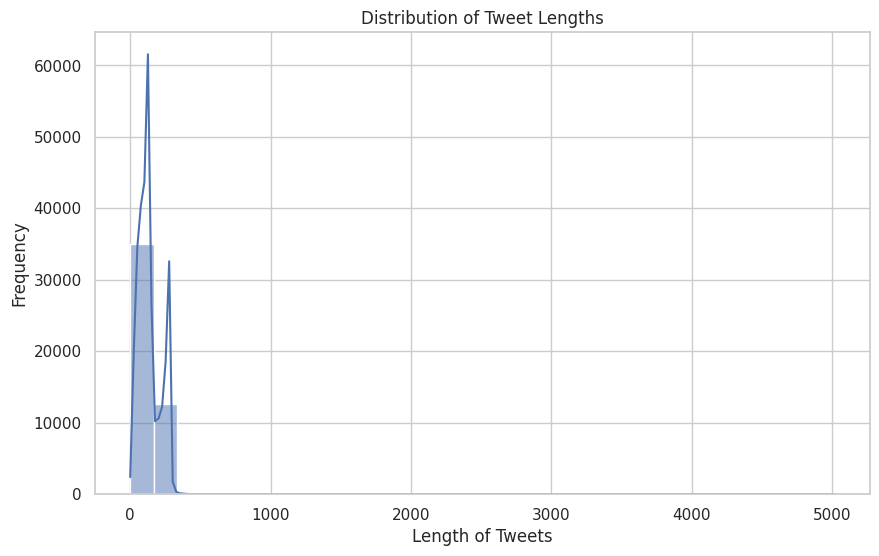

In [ ]:
# Calculate the length of each tweet and create a new column 'tweet_length' in the DataFrame
df['tweet_length'] = df['tweet_text'].apply(len)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram of the tweet lengths with a Kernel Density Estimate (KDE) overlay
sns.histplot(df['tweet_length'], bins=30, kde=True)

# Set the title of the plot
plt.title('Distribution of Tweet Lengths')

# Set the label for the x-axis
plt.xlabel('Length of Tweets')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

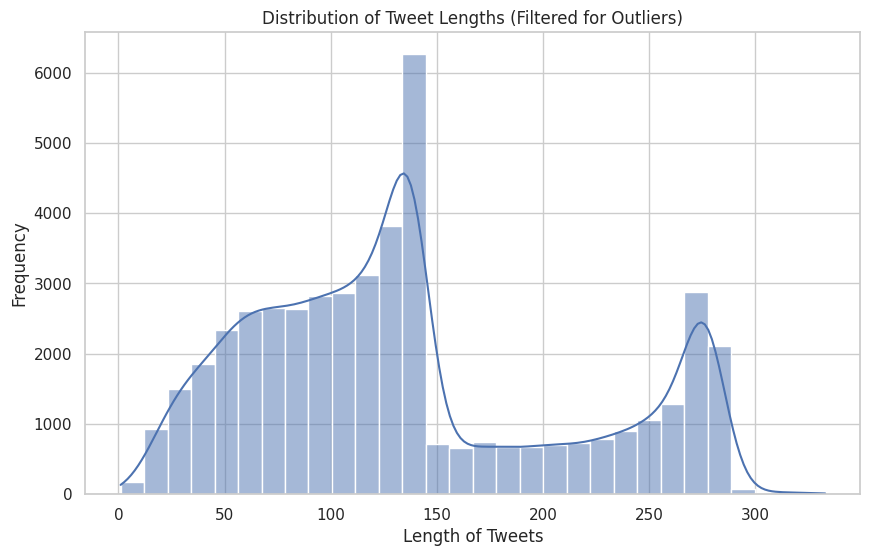

In [ ]:
# Calculate the length of each tweet and create a new column 'tweet_length' in the DataFrame
df['tweet_length'] = df['tweet_text'].apply(len)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['tweet_length'].quantile(0.25)
Q3 = df['tweet_length'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['tweet_length'] >= lower_bound) & (df['tweet_length'] <= upper_bound)]

# Set the figure size for the plot
plt.figure(figsize=(10, 6))
# Create a histogram of the tweet lengths with a Kernel Density Estimate (KDE) overlay
sns.histplot(df['tweet_length'], bins=30, kde=True)

# Set the title of the plot
plt.title('Distribution of Tweet Lengths (Filtered for Outliers)')

# Set the label for the x-axis
plt.xlabel('Length of Tweets')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

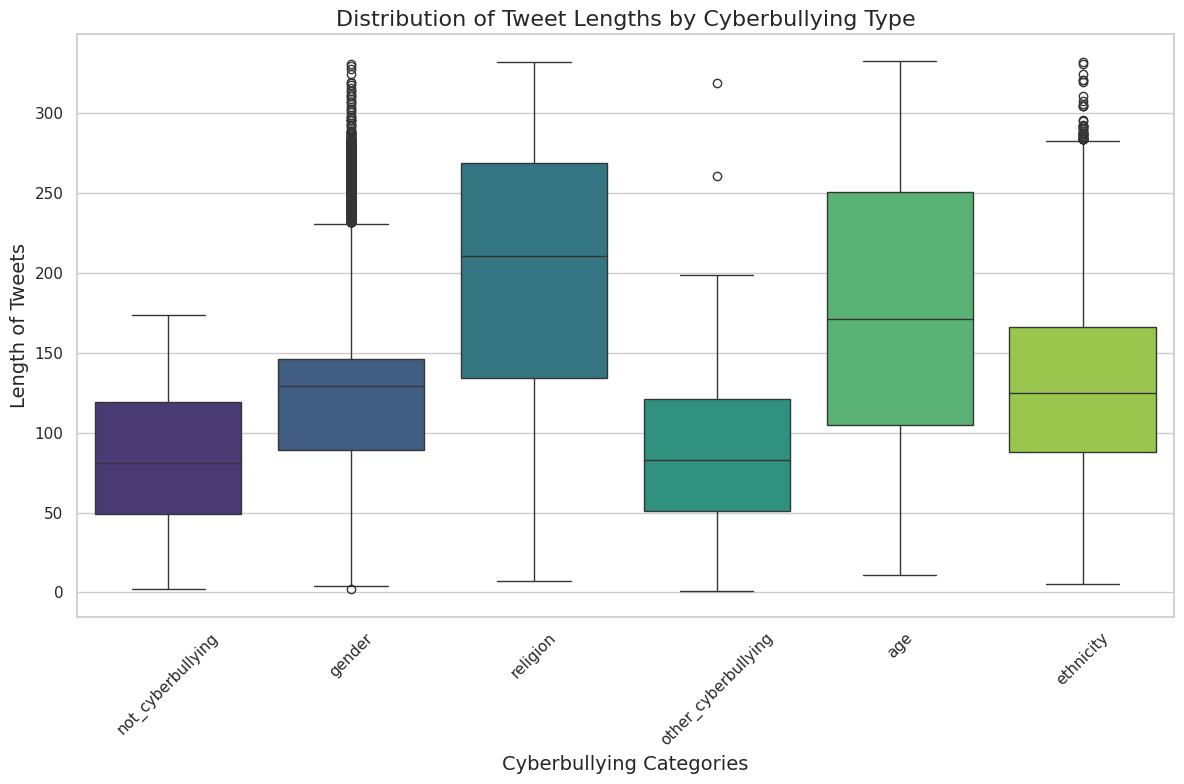

In [ ]:
# Calculate the length of the tweets
df['length'] = df['tweet_text'].apply(len)  # Create a new column 'length' with the length of the tweets

# Set the visual style of the plot
sns.set(style="whitegrid")  # Set the background style for the plot

# Create a box plot to show the distribution of tweet lengths by cyberbullying type
plt.figure(figsize=(12, 8))  # Set the figure size
box_plot = sns.boxplot(data=df, x='cyberbullying_type', y='length', palette='viridis')  # Create a box plot

# Add titles and labels
plt.title('Distribution of Tweet Lengths by Cyberbullying Type', fontsize=16)  # Title of the plot
plt.xlabel('Cyberbullying Categories', fontsize=14)  # X-axis label
plt.ylabel('Length of Tweets', fontsize=14)  # Y-axis label

# Rotate x labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()  # Display the box plot

In [ ]:
import nltk

# Baixar recursos do NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Para suporte a idiomas adicionais, se necessário

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
display(df['tweet_text'])

,tweet_text
0,"In other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...
2,@XochitlSuckkks a classy whore? Or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...
...,...
47687,"Black ppl aren't expected to do anything, depe..."
47688,Turner did not withhold his disappointment. Tu...
47689,I swear to God. This dumb nigger bitch. I have...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


In [ ]:
import re
import pandas as pd
import emoji

def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+', '', tweet)

    # Remove menções (@usuario) e hashtags (#hashtag)
    tweet = re.sub(r'@\w+|#\w+', '', tweet)

    # Remove caracteres especiais (mantém apenas letras e espaços)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)

    # Converte para minúsculas
    tweet = tweet.lower()
    # Lida com emojis (opcional: você pode traduzir emojis em palavras ou removê-los)
    tweet = emoji.demojize(tweet)  # Transforma emojis em texto (ex: 😊 -> :smiling_face_with_smiling_eyes:)

    # Remove múltiplos espaços
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    return tweet

# Exemplo de uso com um DataFrame
# df = pd.DataFrame({'tweet_text': ["This is a sample tweet! 😊", "Another tweet #example!"]})

# Aplicar a função de pré-processamento
df['cleaned_text'] = df['tweet_text'].apply(preprocess_tweet)

# Exibir o DataFrame resultante
print(df[['tweet_text', 'cleaned_text']])

                                              tweet_text  \
0      In other words #katandandre, your food was cra...   
1      Why is #aussietv so white? #MKR #theblock #ImA...   
2      @XochitlSuckkks a classy whore? Or more red ve...   
3      @Jason_Gio meh. :P  thanks for the heads up, b...   
4      @RudhoeEnglish This is an ISIS account pretend...   
...                                                  ...   
47687  Black ppl aren't expected to do anything, depe...   
47688  Turner did not withhold his disappointment. Tu...   
47689  I swear to God. This dumb nigger bitch. I have...   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...   

                                            cleaned_text  
0              in other words your food was crapilicious  
1                                        why is so white  
2             a classy whore or more red velvet cupcakes  
3      meh p thanks for the heads up but no

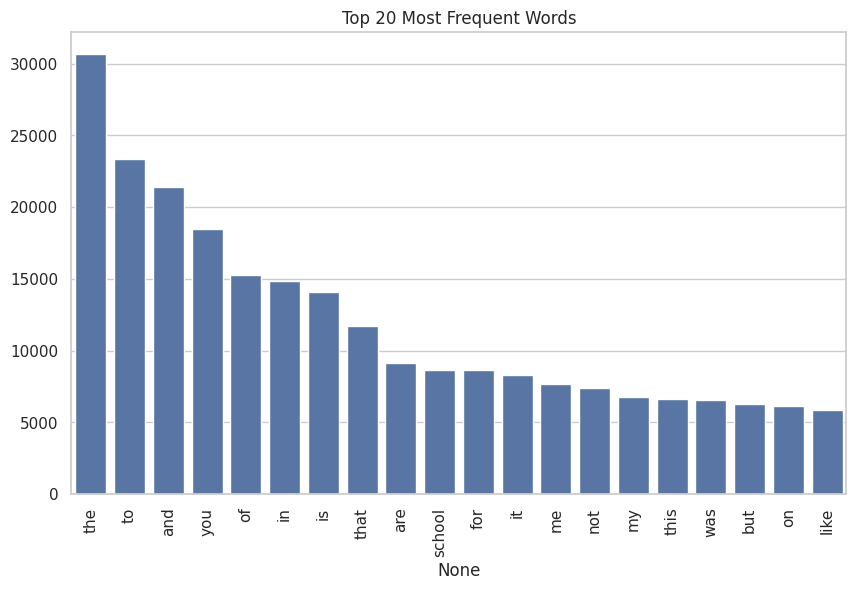

In [ ]:
# Initialize the Count Vectorizer with a maximum of 1000 features
vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the cleaned text data into a matrix of token counts
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Visualization of word frequency
# Create a DataFrame from the matrix with feature names as columns
word_freq = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Sum the frequencies of each word and sort them in descending order
word_freq_sum = word_freq.sum().sort_values(ascending=False)

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))
# Create a bar plot for the top 20 most frequent words
sns.barplot(x=word_freq_sum.head(20).index, y=word_freq_sum.head(20).values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Top 20 Most Frequent Words')

# Display the plot
plt.show()

In this plot, we display the top 20 most frequent words found in our cleaned tweets. The bar chart allows us to quickly identify which words are most commonly associated with the cyberbullying categories in our dataset.

Next, we will create a word cloud to visualize the most impactful words in the dataset. A word cloud provides a visually engaging way to highlight the frequency of words, where more frequently occurring words appear larger than less frequent ones.

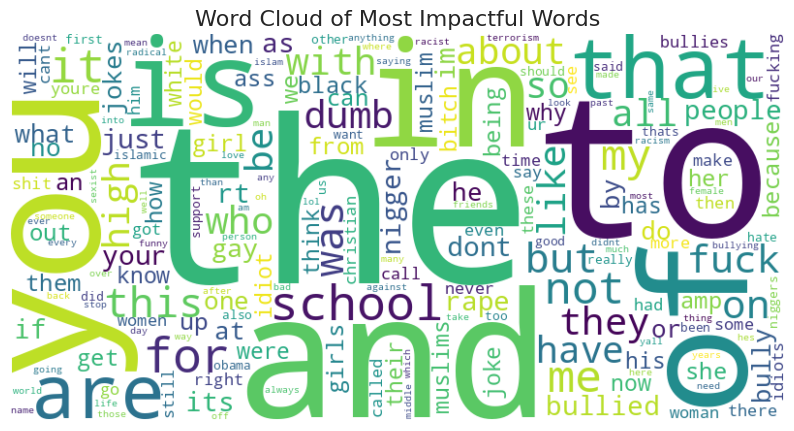

In [ ]:
# Initialize the Count Vectorizer with a maximum of 1000 features
vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the cleaned text data into a matrix of token counts
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Create a DataFrame from the matrix with feature names as columns
word_freq = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Sum the frequencies of each word and sort them in descending order
word_freq_sum = word_freq.sum().sort_values(ascending=False)

# Create a string of words based on their frequencies
word_freq_dict = word_freq_sum.to_dict()  # Convert the word frequencies to a dictionary

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis',
                      max_words=200).generate_from_frequencies(word_freq_dict)

# Set up the plot for the word cloud
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
plt.axis('off')  # Turn off the axis

# Set the title of the word cloud
plt.title('Word Cloud of Most Impactful Words', fontsize=16)

# Show the plot
plt.show()

The word cloud generated above visually represents the most impactful words in our dataset. This format allows us to quickly grasp the most significant terms related to cyberbullying, facilitating a deeper understanding of the language used in harmful tweets.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['cyberbullying_type'], test_size=0.2, random_state=42)

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Define a common TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [ ]:
# Function to create and train models
def train_model(model, param_grid, X_train, y_train):
    pipeline = make_pipeline(tfidf_vectorizer, model)
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search

In [ ]:
# Define models and their hyperparameters
models = {
    # Uncomment and define Naive Bayes and SVM if needed
    'Naive Bayes': (MultinomialNB(), {'multinomialnb__alpha': [0.1, 1, 10]}),
    'SVM': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {
        'xgbclassifier__n_estimators': [50, 100, 200],
        'xgbclassifier__max_depth': [3, 5, 7],
        'xgbclassifier__learning_rate': [0.01, 0.1, 0.2]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'randomforestclassifier__n_estimators': [50, 100, 200],
        'randomforestclassifier__max_depth': [None, 10, 20],
        'randomforestclassifier__min_samples_split': [2, 5, 10]
    })
}

In [ ]:
# Initialize a dictionary to store evaluation results
results = {}

Model: Naive Bayes
Accuracy: 0.7330
Classification Report:
                     precision    recall  f1-score   support

                age       0.78      0.94      0.85      1586
          ethnicity       0.89      0.89      0.89      1592
             gender       0.75      0.81      0.78      1526
  not_cyberbullying       0.55      0.36      0.44      1624
other_cyberbullying       0.52      0.47      0.49      1603
           religion       0.80      0.95      0.87      1591

           accuracy                           0.73      9522
          macro avg       0.72      0.74      0.72      9522
       weighted avg       0.71      0.73      0.72      9522



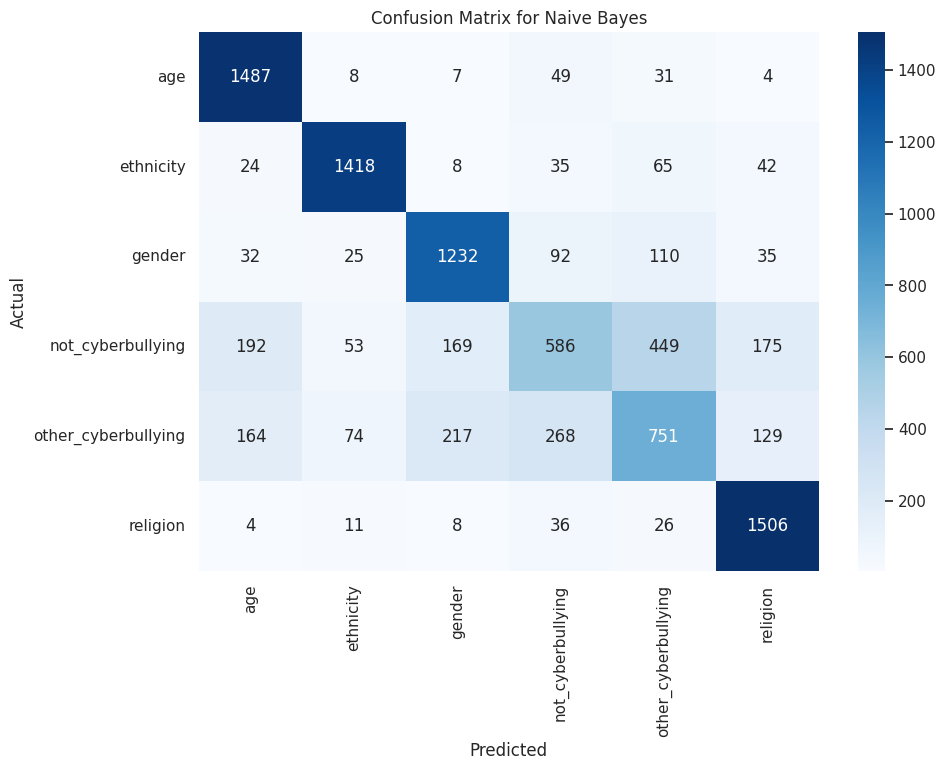

In [ ]:
# Loop through the predictions dictionary to evaluate each model
for model_name, y_pred in predictions.items():
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    # Store results in the results dictionary
    results[model_name] = {
        'accuracy': accuracy,
        'report': report
    }

    # Print the evaluation results for the current model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    # Generate and display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
 #Determine the best model based on accuracy
best_model = max(results, key=lambda x: results[x]['accuracy'])
best_accuracy = results[best_model]['accuracy']

print(f"The best model is: {best_model} with an accuracy of {best_accuracy:.4f}.")

The best model is: Naive Bayes with an accuracy of 0.7330.


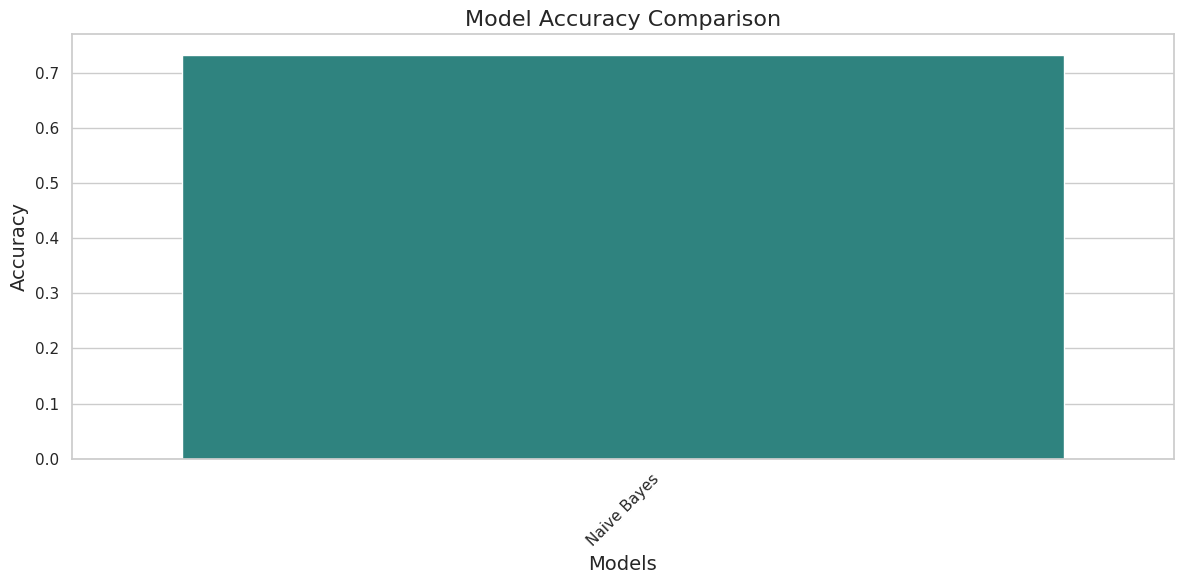

In [ ]:
# Prepare data for plotting
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

# Create a DataFrame for better plotting
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot for model accuracy
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)# Display the plot
plt.tight_layout()
plt.show()

Conclusion and Next Steps ¶
In this project, we developed machine learning models to detect various forms of cyberbullying on Twitter. Our analysis revealed significant insights into the prevalence of different types of cyberbullying, with religion and age being the most common categories. The models achieved varying levels of accuracy, with XGBoost performing the best at 82.96%.




Recommendations:¶
Implement Monitoring Tools: Social media platforms should consider implementing automated monitoring tools to detect and flag harmful content in real-time.
Educational Initiatives: Schools and organizations should promote awareness programs about the effects of cyberbullying and encourage positive online behavior.

Future Work:¶
Real-Time Detection: Explore the implementation of the model as a real-time detection system for social media platforms.
Deep Learning Approaches: Investigate the use of deep learning techniques to improve accuracy in text classification tasks.
By continuing to refine our models and approaches, we can contribute to creating a safer online environment for all users.